# 1 Binomial Model

In [5]:
import matplotlib.pyplot as plt

def binomial_model(S0, K, T, r, u, d, N, option_type="call", tree="yes"):

    '''
    Parameters:
    S0          : initial stock price at time t=0
    K           : strike price of the option
    T           : time to maturity (in years)
    r           : risk-free interest rate (annualized)
    u           : upward movement factor (stock price increase multiplier)
    d           : downward movement factor (stock price decrease multiplier)
    N           : number of time steps in the binomial tree
    option_type : "call" or "put", default is "call"
    tree        : "yes" or "no", default is "yes"
    '''
    
    # dt = Time increment per step in binomial tree
    dt = T / N  

    # R = Risk-free rate per step
    R = (1 + r * dt)  

    # p = Risk-neutral probability of an up move
    p = (R - d) / (u - d)
   
    # q = Risk-neutral probability of a down move
    q = 1 - p   

    # Initialising the stock prices at maturity in a binomial tree
    stock_tree = [[S0]]
    for i in range(1, N + 1):
        level_prices = [S0 * (u ** j) * (d ** (i - j)) for j in range(i + 1)]
        stock_tree.append(level_prices)

    # Initialising the option values at maturity for either call or put
    if option_type == "call":
        option_values = [max(0, stock_price - K) for stock_price in stock_tree[-1]]
    elif option_type == "put":
        option_values = [max(0, K - stock_price) for stock_price in stock_tree[-1]]
    else:
        raise ValueError("Invalid option type. Choose 'call' or 'put'.")

    # Calculating the option price at earlier nodes
    for i in range(N - 1, -1, -1):
        option_values = [
            (p * option_values[j + 1] + q * option_values[j]) / R
            for j in range(i + 1)
        ]

    # If tree is set to "yes", visualise the binomial tree
    if tree == "yes":
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_title('Binomial Tree for Stock Prices')
        ax.set_xlabel('Time')
        ax.set_ylabel('Stock Price')

        ax.set_yticks([])

        # Plotting the nodes and lines connecting them
        for i in range(len(stock_tree)):
            for j in range(len(stock_tree[i])):
                # Add text slightly above each node to avoid overlapping with lines
                ax.text(i, stock_tree[i][j] * 1.015, f'{stock_tree[i][j]:.0f}', ha='center', va='bottom')
                if i < len(stock_tree) - 1:
                    # Plotting the lines in black connecting nodes
                    ax.plot([i, i + 1], [stock_tree[i][j], stock_tree[i + 1][j]], 'k-')
                    ax.plot([i, i + 1], [stock_tree[i][j], stock_tree[i + 1][j + 1]], 'k-')

        # Setting the x axis to Integers only
        ax.set_xticks(range(N + 1))
        plt.show()

    # Returning the formatted option price
    if option_type == "call":
        print(f"Binomial Call Option Price: {option_values[0]:.2f}")
    elif option_type == "put":
        print(f"Binomial Put Option Price: {option_values[0]:.2f}")

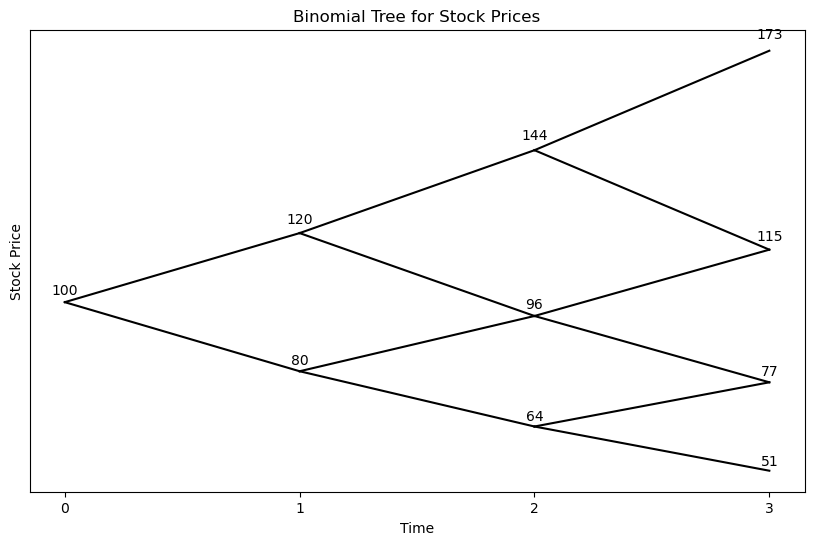

Binomial Call Option Price: 11.49


In [6]:
# Example of Binomial Model

binomial_model(S0=100, K=110, T=1, r=0.05, u=1.2, d=0.8, N=3, option_type="call", tree="yes")